<a href="https://colab.research.google.com/github/SangaviGR/LeukemiaDetection/blob/main/AI_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

x_test =  test.iloc[:,:-1]
y_test = test.iloc[:,-1]

x = data.iloc[:,:-1]  # Features
y = data.iloc[:,-1]  # Target (labels)
x.drop(x.columns[[0]], axis = 1, inplace = True)
x_test.drop(x_test.columns[[0]],axis = 1,inplace = True)


<ipython-input-18-6d092bd2b999>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(x.columns[[0]], axis = 1, inplace = True)
<ipython-input-18-6d092bd2b999>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(x_test.columns[[0]],axis = 1,inplace = True)


DECISION TREE FUNCTION USING INBUILT FUNCTION

Accuracy: 0.92
Matthews correlation coefficient: 0.8140253383258121


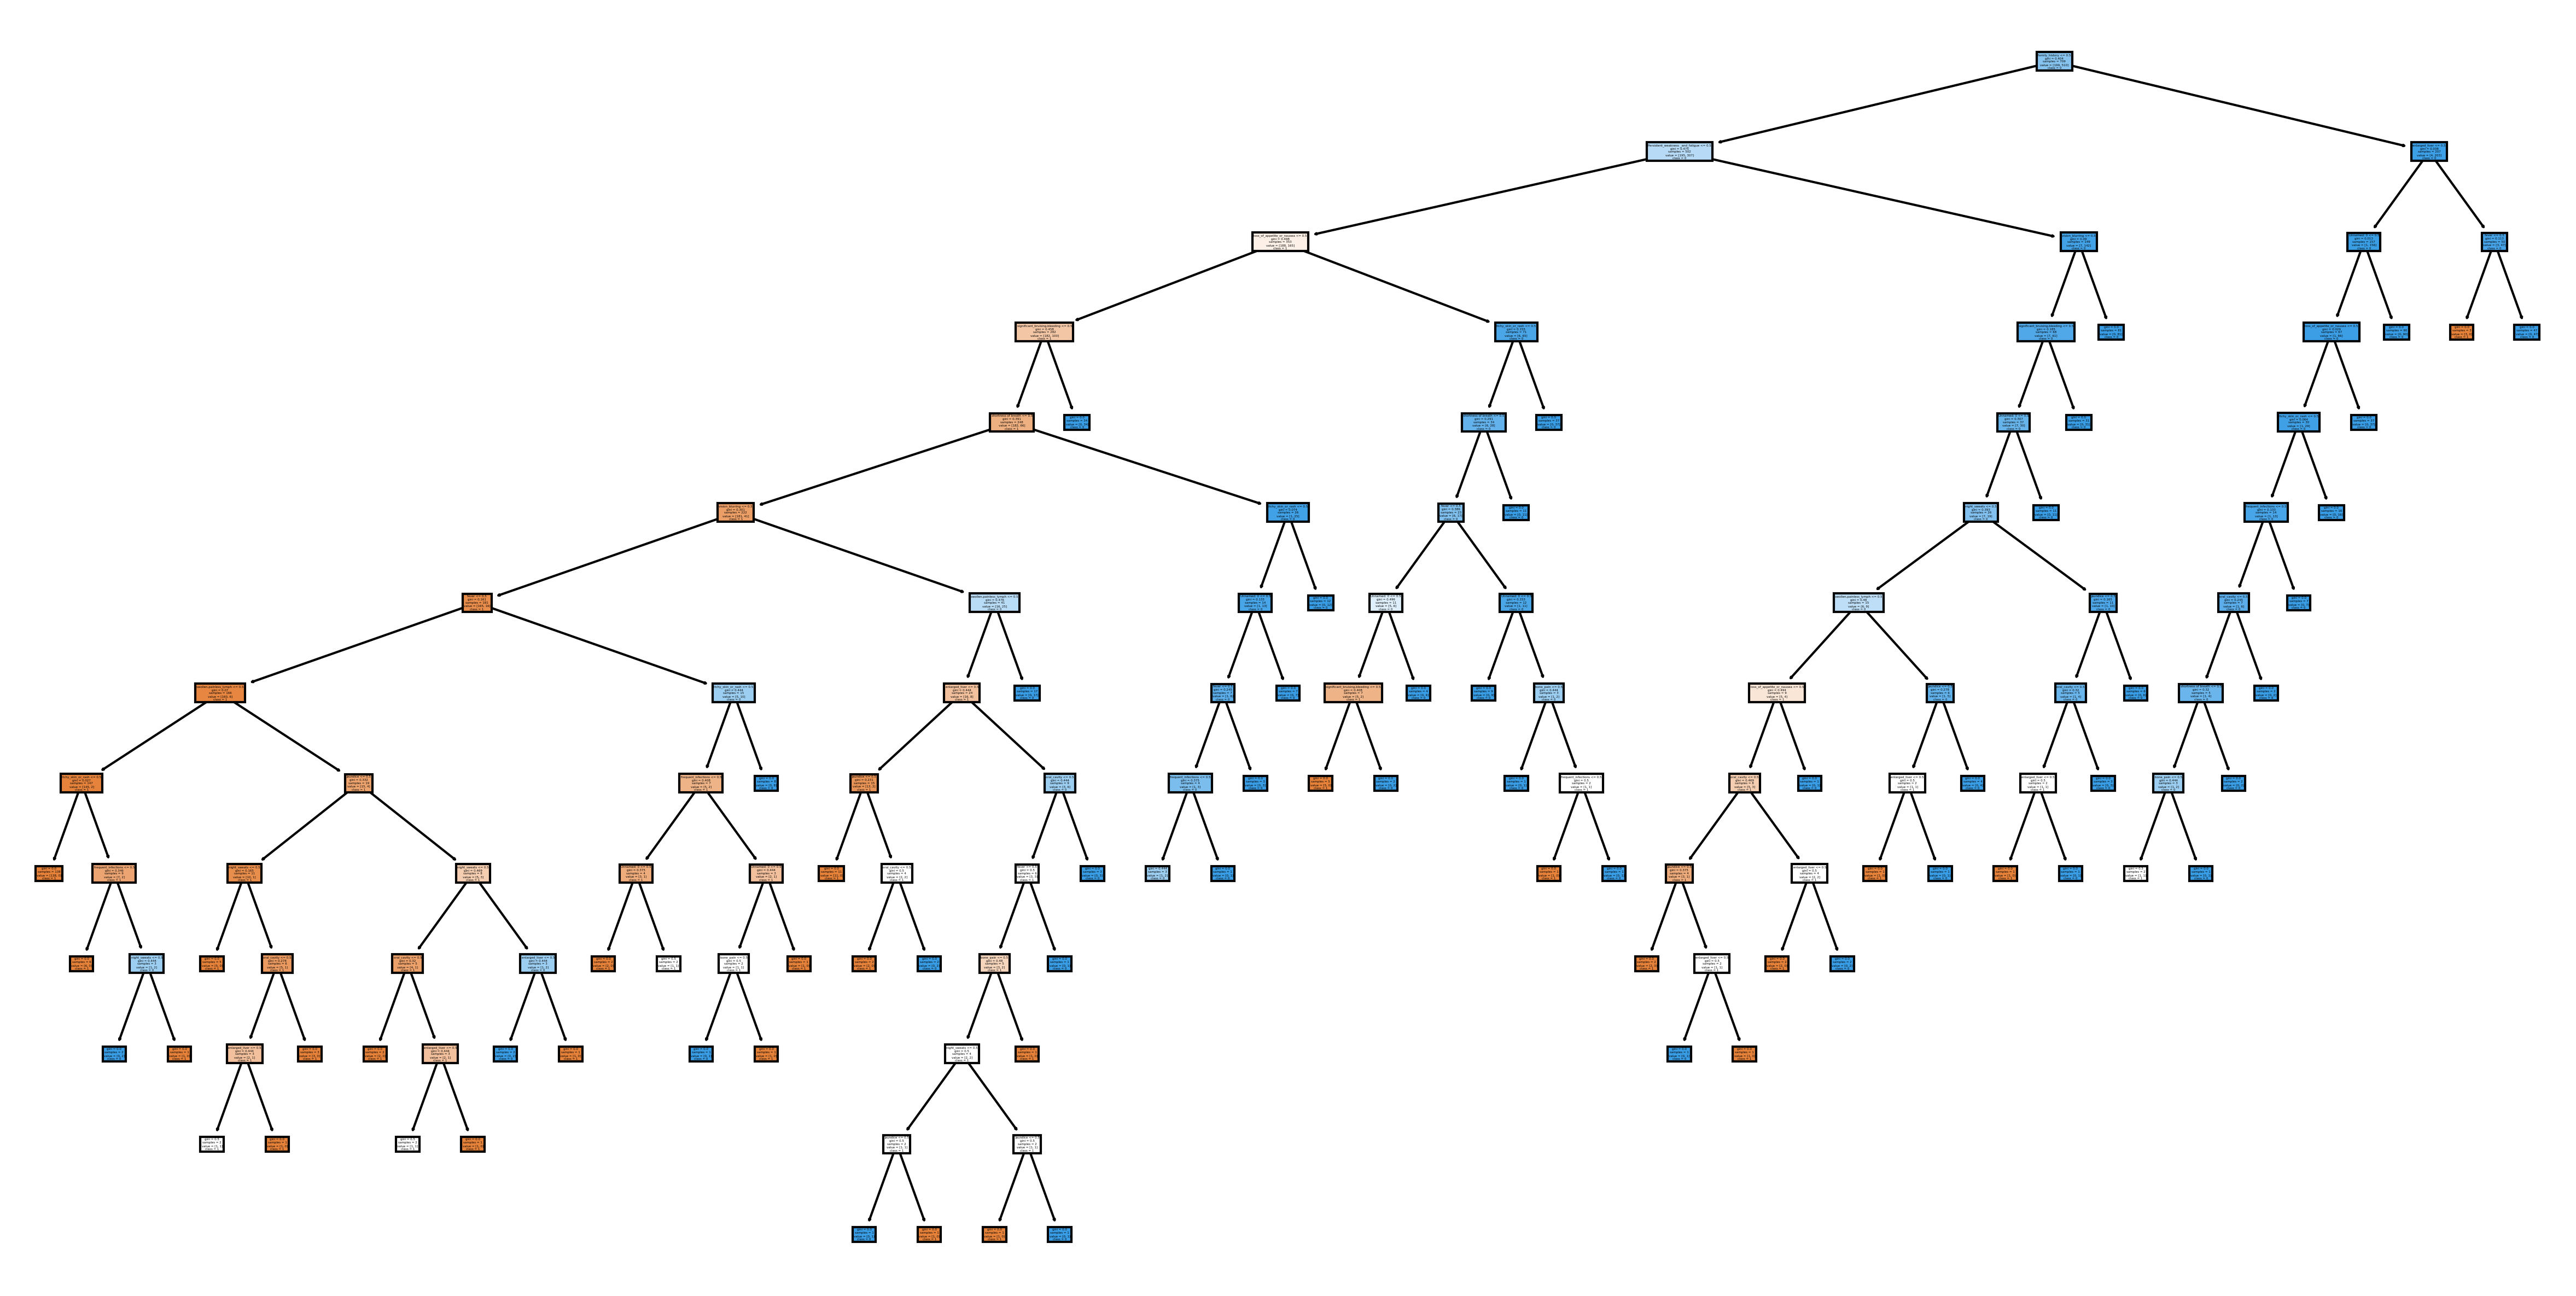

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.metrics import matthews_corrcoef

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the entire data
classifier.fit(x, y)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Calculate the Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", mcc)
# Convert class names to strings
class_names = [str(class_name) for class_name in data.iloc[:,-1].unique()]

# Visualize the decision tree
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(classifier, filled=True, feature_names=data.columns[:-1], class_names=class_names)

# Save the plot as an image
plt.savefig('decision_tree.png')

# Show the plot (optional)
plt.show()



Area under the ROC curve: 0.9230352303523035


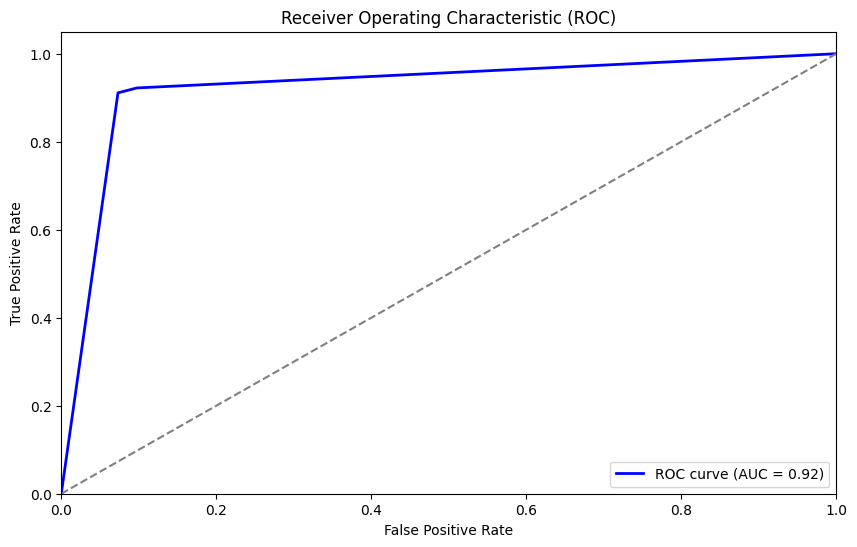

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability estimates for the positive class
y_probs = classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")0          +
plt.show()


DECISION TREE CODE

In [ ]:
import numpy as np

class DecisionTreeEntropy:
    def __init__(self, max_depth=None):
        self.tree = {}
        self.max_depth = max_depth

    def fit(self, X, y):
        self.X = X
        self.y = y
        self._build_tree()

    def _calculate_entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        n = len(y)
        for c in classes:
            p = np.sum(y == c) / n
            entropy -= p * np.log2(p)
        return entropy

    def _information_gain(self, feature, threshold):
        left_indices = np.where(feature <= threshold)[0]
        right_indices = np.where(feature > threshold)[0]
        left_entropy = self._calculate_entropy(self.y[left_indices])
        right_entropy = self._calculate_entropy(self.y[right_indices])
        parent_entropy = self._calculate_entropy(self.y)
        n = len(self.y)
        information_gain = parent_entropy - (len(left_indices) / n) * left_entropy - (len(right_indices) / n) * right_entropy
        return information_gain

    def _find_best_split(self, X, y):
        best_feature_index = -1
        best_threshold = None
        max_info_gain = -float('inf')
        for i in range(X.shape[1]):
            feature_values = X[:, i]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                info_gain = self._information_gain(feature_values, threshold)
                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_feature_index = i
                    best_threshold = threshold
        return best_feature_index, best_threshold

    def _build_tree(self, depth=0):
      def build_subtree(X, y, depth):
          if self.max_depth is not None and depth >= self.max_depth:
              unique_classes, counts = np.unique(y, return_counts=True)
              return {'class': unique_classes[np.argmax(counts)]}
          if len(np.unique(y)) == 1:
              return {'class': y[0]}
          if X.shape[0] == 0:
              unique_classes, counts = np.unique(y, return_counts=True)
              return {'class': unique_classes[np.argmax(counts)]}
          best_feature_index, best_threshold = self._find_best_split(X, y)
          if best_feature_index == -1:
              unique_classes, counts = np.unique(y, return_counts=True)
              return {'class': unique_classes[np.argmax(counts)]}
          left_indices = np.where(X[:, best_feature_index] <= best_threshold)[0]
          right_indices = np.where(X[:, best_feature_index] > best_threshold)[0]
          left_subtree = build_subtree(X[left_indices], y[left_indices], depth + 1)
          right_subtree = build_subtree(X[right_indices], y[right_indices], depth + 1)
          return {'feature_index': best_feature_index, 'threshold': best_threshold,
                  'left': left_subtree, 'right': right_subtree}

      self.tree = build_subtree(self.X, self.y, depth=depth)

    def predict(self, X):
        def predict_single(x, tree):
            if 'class' in tree:
                return tree['class']
            if x[tree['feature_index']] <= tree['threshold']:
                return predict_single(x, tree['left'])
            else:
                return predict_single(x, tree['right'])

        return [predict_single(x, self.tree) for x in X]

# Usage example
if __name__ == "__main__":
    # Assuming your data is loaded into variables x and y
    dt = DecisionTreeEntropy(max_depth=10)
    dt.fit(x.values, y.values)
    predictions = dt.predict(x_test.values)

    # Calculate accuracy
    correct_predictions = np.sum(predictions == y_test)
    total_samples = len(y_test)
    accuracy = correct_predictions / total_samples
    print("Accuracy:", accuracy)
    mcc = matthews_corrcoef(y_test, predictions)
    print("Matthews correlation coefficient:", mcc)


Accuracy: 0.916030534351145
Matthews correlation coefficient: 0.8035657619807416


In [ ]:
import numpy as np

# Define the Node class for decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
        self.feature = feature  # Feature index for splitting
        self.threshold = threshold  # Threshold value for splitting
        self.left = left  # Left subtree
        self.right = right  # Right subtree
        self.label = label  # Class label for leaf nodes

# Calculate Gini impurity for a given target variable
def gini_impurity(y):
    classes = np.unique(y)
    n = len(y)
    impurity = 1.0
    for c in classes:
        p = np.sum(y == c) / n
        impurity -= p ** 2
    return impurity

# Split the data based on a given feature and threshold
def split_data(X, y, feature, threshold):
    left_indices = X[:, feature] <= threshold
    right_indices = X[:, feature] > threshold
    return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

# Find the best split (feature and threshold) that minimizes Gini impurity
def find_best_split(X, y):
    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    n_features = X.shape[1]
    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature, threshold)
            gini = (len(y_left) * gini_impurity(y_left) + len(y_right) * gini_impurity(y_right)) / len(y)
            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

# Build the decision tree recursively
def build_tree(X, y):
    # Base case: if all samples belong to the same class, create a leaf node
    if len(np.unique(y)) == 1:
        return Node(label=y[0])

    # Find the best split (feature and threshold)
    best_feature, best_threshold = find_best_split(X, y)

    # Split the data based on the best split
    X_left, y_left, X_right, y_right = split_data(X, y, best_feature, best_threshold)

    # Recursive call to build left and right subtrees
    left_subtree = build_tree(X_left, y_left)
    right_subtree = build_tree(X_right, y_right)

    # Create and return the current node
    return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

# Predict the class label for a single sample
def predict_sample(x, node):
    if node.label is not None:
        return node.label
    if x[node.feature] <= node.threshold:
        return predict_sample(x, node.left)
    else:
        return predict_sample(x, node.right)

# Predict the class labels for multiple samples
def predict(X, root):
    return [predict_sample(x, root) for x in X]


# Split the data into features (X) and target variable (y)
X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

# Build the decision tree
root = build_tree(X_train, y_train)

# Make predictions on the test data
y_pred = predict(X_test, root)

# Calculate the accuracy of the model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", mcc)

Accuracy: 0.816793893129771
Matthews correlation coefficient: 0.6801206529463009


Accuracy: 0.93
Matthews correlation coefficient: 0.8392210144927537


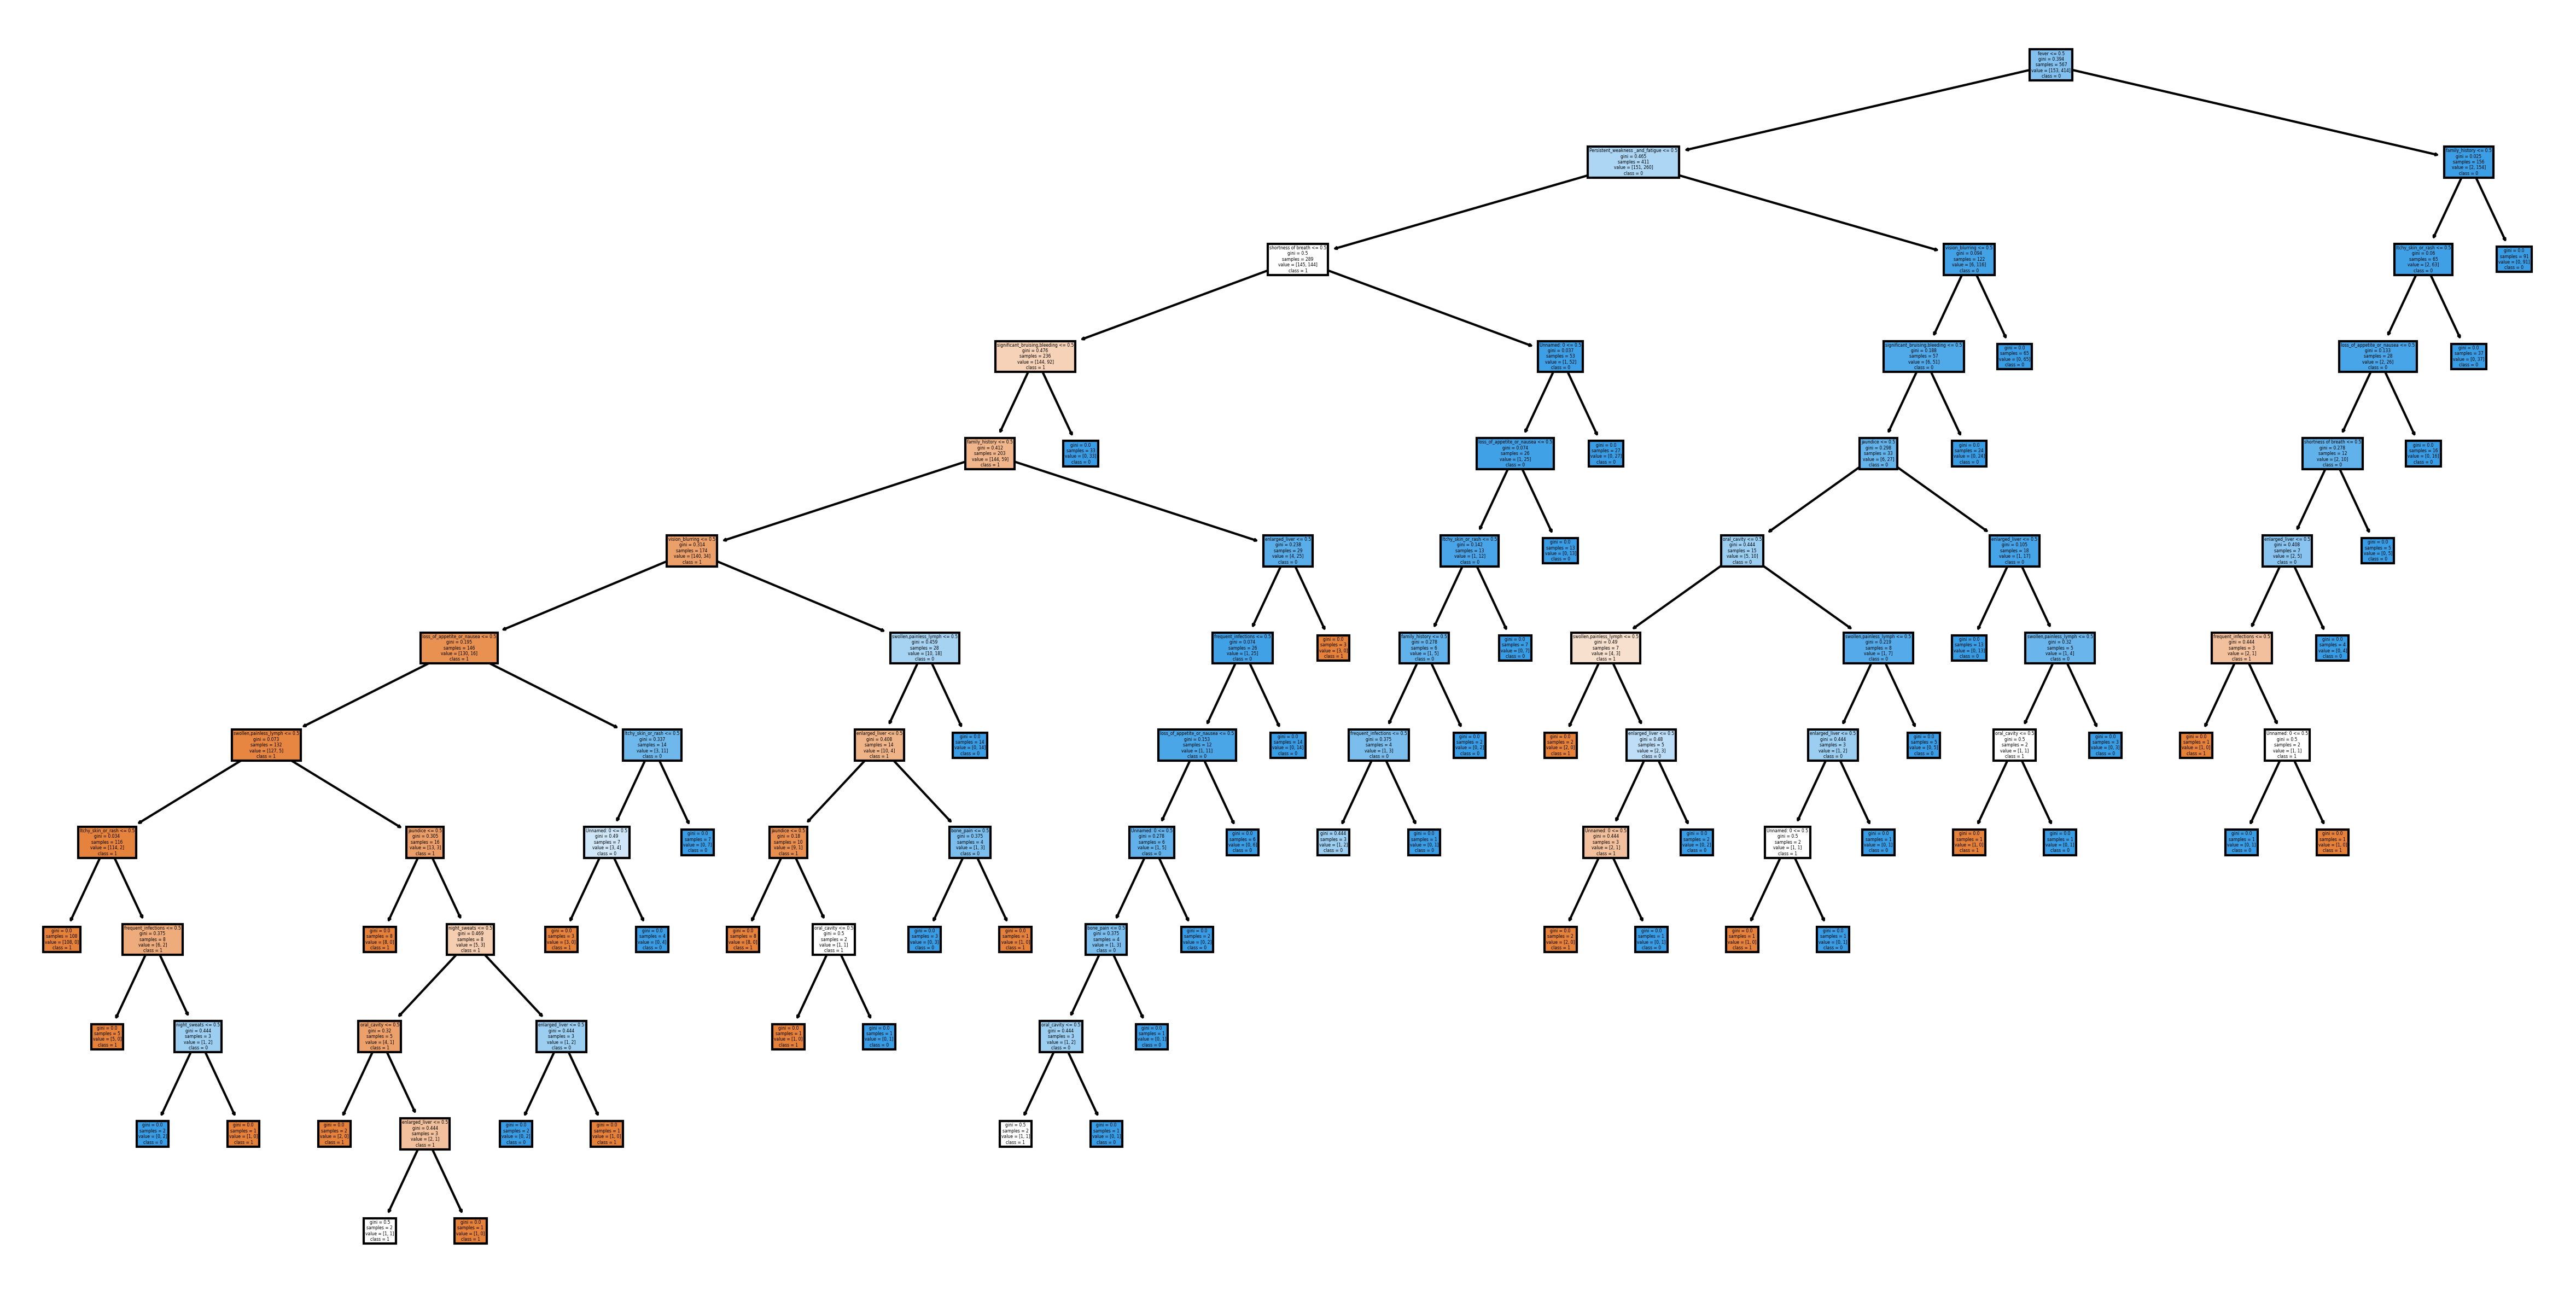

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = data.iloc[:,:-1]  # Features
y = data.iloc[:,-1]  # Target (labels)

# Drop the first column from X
X = X.drop(X.columns[[0]], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", mcc)
# You can also visualize the decision tree (optional)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Convert class names to strings
class_names = [str(class_name) for class_name in data.iloc[:,-1].unique()]

# Visualize the decision tree
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(classifier, filled=True, feature_names=data.columns[:-1], class_names=class_names)

# Save the plot as an image
plt.savefig('decision_tree_train.png')

# Show the plot (optional)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

data.drop(data.columns[[0]], axis = 1, inplace = True)
test.drop(test.columns[[0]], axis = 1, inplace = True)

x_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# Create and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

# Make predictions
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", mcc)




Logistic Regression Accuracy: 0.9312977099236641
Matthews correlation coefficient: 0.8485134752341826


AUC Score: 0.9840108401084011


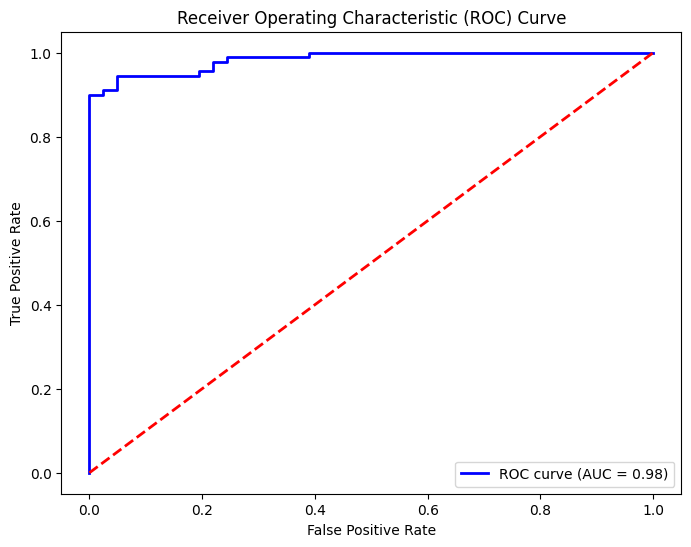

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities
y_probs = logreg.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
